In [1]:
import datetime
import warnings

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

warnings.filterwarnings(action='ignore')

In [2]:
noise_df = pd.read_excel('data/snp-noise-data.xlsx', index_col=0)
len(noise_df)

8313

In [3]:
noise_df[['Noise']].describe()

,Noise
count,8313.000000
mean,-0.532262
std,57.519585
min,-693.266907
25%,-18.671936
50%,-0.219101
75%,18.540009
max,386.008118


In [4]:
noise_df['year'] = noise_df.index.year

period_df = pd.merge(noise_df[['Noise']].describe(), 
                     noise_df.groupby(pd.cut(noise_df['year'], 
                                             bins=range(noise_df['year'].min(), 2026, 5)
                                             ))
                             .describe()
                             .drop(columns=['year'])
                             .T
                             .loc['Noise'], 
                     how='left', 
                     left_index=True, 
                     right_index=True
                     )
period_df = period_df.rename(columns={'Noise': 'Total'})
noise_df =  noise_df.drop(columns=['year'])
period_df

,Total,"(1990, 1995]","(1995, 2000]","(2000, 2005]","(2005, 2010]","(2010, 2015]","(2015, 2020]","(2020, 2025]"
count,8313.000000,1264.000000,1263.000000,1256.000000,1259.000000,1258.000000,1259.000000,539.000000
mean,-0.532262,-1.190270,-1.762640,1.630042,2.043702,0.662571,-11.027551,14.209266
std,57.519585,7.321690,33.533255,34.617386,42.417971,37.832511,96.706038,124.774992
min,-693.266907,-30.842934,-147.297394,-154.920029,-156.835052,-140.184631,-693.266907,-343.115295
25%,-18.671936,-5.604271,-18.075546,-17.780735,-22.579834,-22.409317,-43.991577,-66.037262
50%,-0.219101,-0.836002,-0.867722,3.516251,0.484863,3.478256,-9.812744,10.097778
75%,18.540009,3.888876,17.019455,22.792923,21.321053,24.937874,24.892517,79.047882
max,386.008118,17.568878,97.696442,97.707947,154.526123,96.833221,386.008118,370.695068


In [5]:
# Quantitive Shifts
noise_df['After Robo-Advisor'] = noise_df.index >= pd.Timestamp('2007-01-01')
noise_df['After 3rd Quantitative Easing'] = noise_df.index >= pd.Timestamp('2012-09-01')

# Crisis
noise_df['Dot-com Bubble'] = ((pd.Timestamp('1996-03-01') <= noise_df.index) &
                              (noise_df.index <= pd.Timestamp('2001-01-01'))
                              )
noise_df['The Great Recession'] = ((pd.Timestamp('2008-09-01') <= noise_df.index) & 
                                   (noise_df.index <= pd.Timestamp('2009-06-01'))
                                   )
noise_df['European Debt Crisis'] = ((pd.Timestamp('2010-03-01') <= noise_df.index) &
                                        (noise_df.index <= pd.Timestamp('2012-01-01'))
                                        )
noise_df['Brexit'] = ((pd.Timestamp('2016-02-01') <= noise_df.index) &
                      (noise_df.index <= pd.Timestamp('2019-01-01'))
                      )
noise_df['COVID-19 Pandemic'] = pd.Timestamp('2020-02-01') <= noise_df.index

In [6]:
quantitive_shift_columns = [
    'After Robo-Advisor', 
    'After 3rd Quantitative Easing',
    ]

crisis_columns = [
    'Dot-com Bubble', 
    'The Great Recession', 
    'European Debt Crisis',
    'Brexit',
    'COVID-19 Pandemic', 
    ]

In [7]:
def get_period(df, columns):
    new_df = pd.DataFrame()
    new_df['Total'] = df['Noise']
    new_df = pd.concat([new_df, 
                        pd.DataFrame({column: df['Noise'][noise_df[column]] for column in columns})
                        ], 
                       axis=1
                       )
    return new_df

In [8]:
quantitive_shift_period = get_period(noise_df, quantitive_shift_columns)
quantitive_shift_period.describe()

,Total,After Robo-Advisor,After 3rd Quantitative Easing
count,8313.000000,4064.000000,2635.000000
mean,-0.532262,-0.548283,-2.150792
std,57.519585,77.445345,90.506801
min,-693.266907,-693.266907,-693.266907
25%,-18.671936,-31.890381,-37.011993
50%,-0.219101,0.056076,-1.340881
75%,18.540009,28.246933,29.887024
max,386.008118,386.008118,386.008118


In [9]:
crisis_period = get_period(noise_df, crisis_columns)
crisis_period.describe()

,Total,Dot-com Bubble,The Great Recession,European Debt Crisis,Brexit,COVID-19 Pandemic
count,8313.000000,1221.000000,188.000000,466.000000,735.000000,771.000000
mean,-0.532262,-1.820364,-7.647145,-1.914049,-4.401704,-5.073210
std,57.519585,33.995119,66.459960,39.849681,55.332249,143.580721
min,-693.266907,-147.297394,-156.835052,-115.181824,-319.825256,-693.266907
25%,-18.671936,-18.284607,-48.141491,-27.097763,-30.941681,-80.854736
50%,-0.219101,-0.992416,-9.906319,-1.901031,-5.204834,-9.520874
75%,18.540009,17.357117,19.466770,21.794052,20.860229,57.478027
max,386.008118,97.696442,154.526123,96.833221,167.834656,386.008118


In [10]:
sns.set(style='darkgrid')

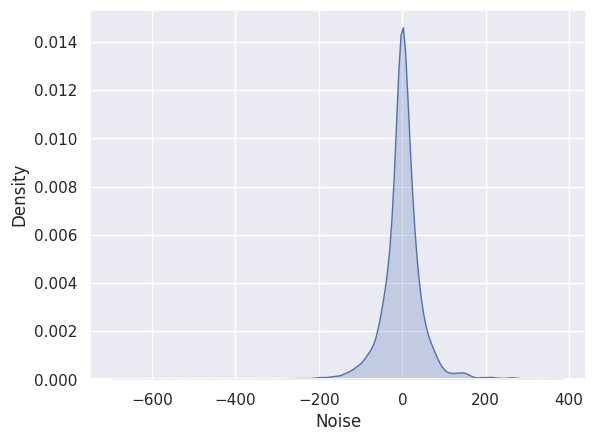

In [11]:
_ = sns.kdeplot(noise_df['Noise'], shade=True, cut=.1)

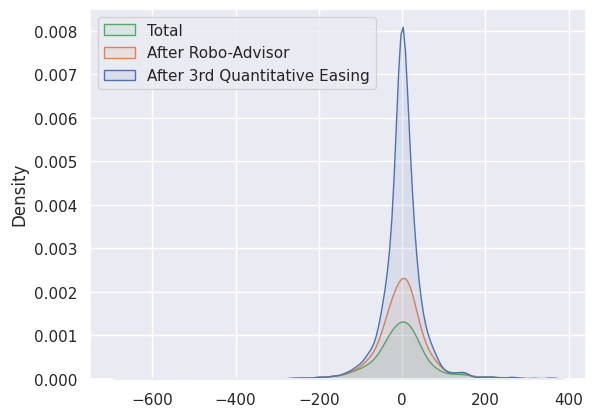

In [12]:
ax = sns.kdeplot(data=quantitive_shift_period, shade=True, cut=.1, alpha=.1)
_ = ax.legend(quantitive_shift_period.columns, loc='upper left')

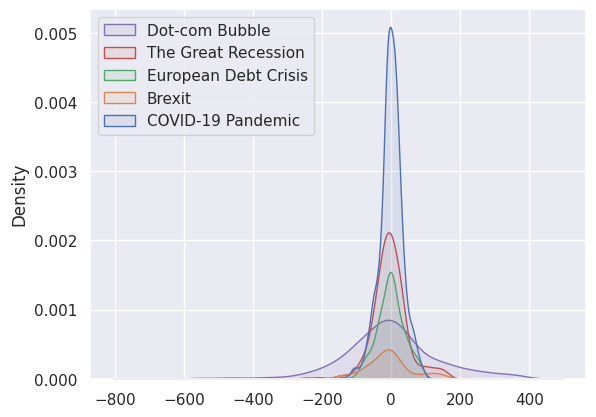

In [13]:
crisis_period = crisis_period.drop(columns=['Total'])
ax = sns.kdeplot(
    data=crisis_period,
    fill=True,
    alpha=.1,
)
_ = ax.legend(crisis_period.columns, loc='upper left')

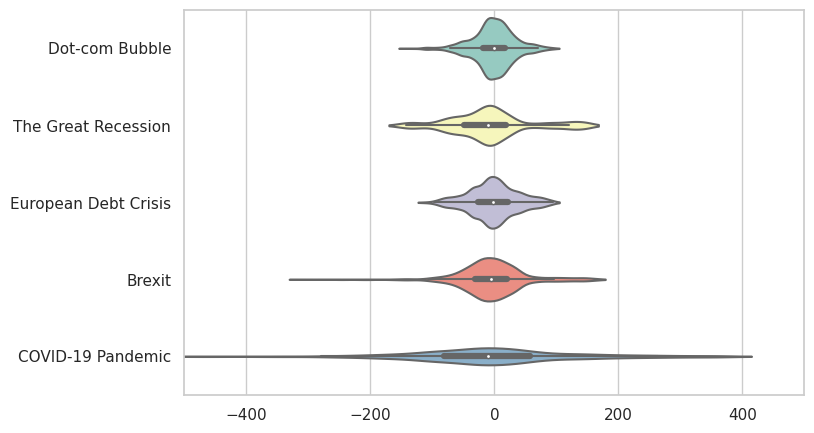

In [14]:
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots(figsize=(8, 5))
sns.violinplot(data=crisis_period, 
               cut=1, 
               bw=.2,
               alpha=1,
               orient='h', 
               palette='Set3',
               ax=ax
               )
_ = ax.set(xlim=(-500, 500))

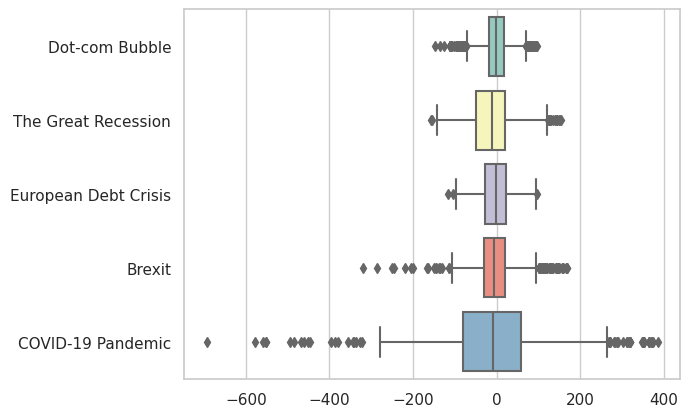

In [15]:
_ = sns.boxplot(data=crisis_period, 
                orient='h', 
                palette='Set3'
                )